In [22]:
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import numpy as np

In [17]:
%matplotlib inline

In [3]:
expDF = pd.read_csv('stroopdata.csv')

In [7]:
expDF.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [19]:
print('C: {}, Ic: {}'.format(stat.iqr(expDF['Congruent']), stat.iqr(expDF['Incongruent'])))

C: 4.3054999999999986, Ic: 5.33475


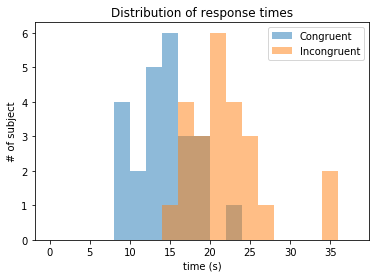

In [28]:
bins = range(0, 40, 2)
plt.figure()
plt.hist(expDF['Congruent'], bins, alpha=0.5)
plt.hist(expDF['Incongruent'], bins, alpha=0.5)
plt.title('Distribution of response times')
plt.xlabel('time (s)')
plt.ylabel('# of subject')
plt.legend(['Congruent', 'Incongruent'])

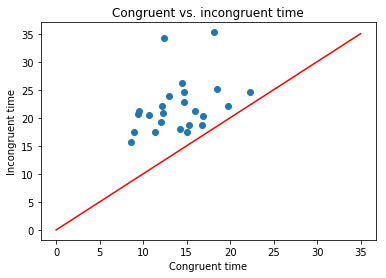

In [35]:
plt.figure()
plt.scatter(expDF['Congruent'], expDF['Incongruent'])
plt.xlabel('Congruent time')
plt.ylabel('Incongruent time')
plt.title('Congruent vs. incongruent time')
plt.plot([0, 35], [0, 35], 'r-')

In [37]:
diffVector = expDF['Incongruent'] - expDF['Congruent']

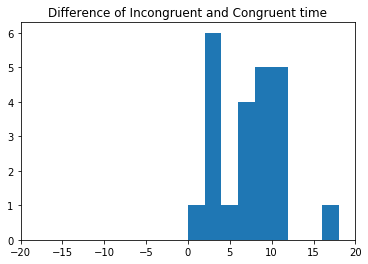

In [43]:
bins = range(0, 20, 2)
plt.figure()
plt.hist(diffVector, bins)
plt.xlim((-20, 20))
plt.title('Difference of Incongruent and Congruent time')

In [47]:
stat.kstest(expDF['Congruent'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [49]:
stat.kstest(expDF['Incongruent'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [59]:
diff_mean = diffVector.mean()
diff_sd = diffVector.std()
diff_SE = diff_sd / np.sqrt(diffVector.shape[0])
print('mu={}, sigma={}, SE={}'.format(diff_mean, diff_sd, diff_SE))
print('T={}'.format(diff_mean / diff_SE))
stat.ttest_rel(expDF['Congruent'], expDF['Incongruent'])

mu=7.964791666666667, sigma=4.864826910359056, SE=0.9930286347783406
T=8.020706944109957


Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)